# Stationarity Test on Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

In [32]:
# Make path relative to parent folder (..)
sys.path.append(str(Path().resolve().parent))

# Local Imports
from src.data.load_raw import load_all_raw
from src.diagnostics.stationarity import run_stationarity_suite

### Load and Align Data

In [33]:
# Load all raw data
raw_data_dict = load_all_raw()

# Concatenate df into master df, align at date
df_all = pd.concat(raw_data_dict.values(), axis=1, keys=raw_data_dict.keys())

# Flatten columns ('bond_yields', 'US10Y') to 'bond_yields_US10Y')
df_all.columns = [f"{grp}_{col}" for grp, col in df_all.columns]

# Daily frequency, forward fill missing data
df_daily = df_all.asfreq('B').ffill()

df_daily.tail()

,bond_yields_GTUSD2Y Govt,bond_yields_GTUSD5Y Govt,bond_yields_GTUSD10Y Govt,bond_yields_GTEUR2Y Govt,bond_yields_GTEUR5Y Govt,bond_yields_GTEUR10Y Govt,bond_yields_GTJPY2Y Govt,bond_yields_GTJPY5Y Govt,bond_yields_GTJPY10Y Govt,bond_yields_GTCNY2Y Govt,...,us_eq_VIX Index,us_eq_SPX Index,fx_1m_EUR1M BGN Curncy,fx_1m_JPY1M BGN Curncy,fx_1m_CNH1M BGN Curncy,fx_1m_AUD1M BGN Curncy,fx_ov_iv_EURUSDVON BGN Curncy,fx_ov_iv_USDJPYVON BGN Curncy,fx_ov_iv_USDCNHVON BGN Curncy,fx_ov_iv_AUDUSDVON BGN Curncy
date,,,,,,,,,,,,,,,,,,,,,
2025-12-25,3.506,3.717,4.136,2.140,2.463,2.861,1.121,1.510,2.042,1.347,...,13.47,6932.05,0.847300,155.3748,6.988175,1.491360,4.8725,9.7400,2.2900,5.9675
2025-12-26,3.480,3.697,4.129,2.140,2.463,2.861,1.102,1.511,2.034,1.342,...,13.60,6929.94,0.848165,156.1133,6.991521,1.488704,3.2975,5.4025,1.7850,5.2700
2025-12-29,3.456,3.669,4.111,2.113,2.429,2.828,1.113,1.514,2.044,1.352,...,14.20,6905.74,0.848133,155.6329,6.985312,1.493654,5.2550,7.8025,2.1950,6.6875
2025-12-30,3.449,3.678,4.123,2.119,2.447,2.854,1.168,1.539,2.059,1.358,...,14.33,6896.24,0.849952,155.9800,6.979304,1.493420,4.7825,7.7175,2.9600,7.3950
2025-12-31,3.475,3.726,4.169,2.120,2.447,2.854,1.168,1.539,2.059,1.365,...,14.95,6845.50,0.850104,156.2791,6.962334,1.498309,5.4750,5.7850,2.7825,5.2500


### Diagnostics on both Level and Differenced Data
**Stationarity tests:**
- Augmented-Dickey-Fuller (ADF) test
    - Assumes non-stationary series
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
    - Assumes stationary series

Series is **stationary** if `adf_p < 0.05` **and** `kpss_p > 0.05`

In [34]:
# Run stationarity tests (ADF and KPSS) on raw values (levels) and first differences

# Levels
results_level = run_stationarity_suite(df_daily)
results_level = results_level.rename(columns={'label': 'level_stationarity', 'adf_p': 'level_adf_p', 'kpss_p': 'level_kpss_p'})

# First differences
df_diff = df_daily.diff().dropna()
results_diff = run_stationarity_suite(df_diff)
results_diff = results_diff.rename(columns={'label': 'diff_stationarity', 'adf_p': 'diff_adf_p', 'kpss_p': 'diff_kpss_p'})

# Rolling variance metric for level data --> if rolling variance trends up significantly, it's likely non-stationary
rolling_var = df_daily.rolling(window=60).var()

/Users/test/Desktop/rates project/Cross-Country-Rates-Relative-Value-NUSInvest2526/src/diagnostics/stationarity.py:47: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, _ = kpss(
/Users/test/Desktop/rates project/Cross-Country-Rates-Relative-Value-NUSInvest2526/src/diagnostics/stationarity.py:47: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, _ = kpss(
/Users/test/Desktop/rates project/Cross-Country-Rates-Relative-Value-NUSInvest2526/src/diagnostics/stationarity.py:47: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, _ = kpss(
/Users/test/Desktop/rates project/Cross-Country-Rates-Relativ

**Caveat for KPSS tests**: For most of the data above, level tests return p-value lower than lowest value output by statsmodel library, while first differences return p-value higher that highest value by statsmodel library.

**Significance**: For level data, most are non-stationary. For first differences data, most are stationary

### Create Stationarity Matrix
If level series is stationary, leave as is. Else, it would require differencing to make it stationary.

In [35]:
# Merge
final_map = pd.merge(
    results_level[['column', 'level_stationarity', 'level_adf_p', 'level_kpss_p']],
    results_diff[['column', 'diff_stationarity']],
    on='column'
)

# Logic for recommendation
def recommend_form(row):
    if "I(0)" in row['level_stationarity']:
        return "Level"
    elif "I(0)" in row['diff_stationarity']:
        return "Diff"
    else:
        return "Ambiguous - Inspect further"

final_map['recommended_form'] = final_map.apply(recommend_form, axis=1)

final_map.to_csv("../results/stationarity_matrix.csv", index=False)

In [37]:
results_path = Path("../results/stationarity_matrix.csv")
df_results = pd.read_csv(results_path)

df_results

,column,level_stationarity,level_adf_p,level_kpss_p,diff_stationarity,recommended_form
0,cesi_CESIAUD Index,I(0) (stationary),6.324657e-12,0.100000,I(0) (stationary),Level
1,cesi_CESIEUR Index,I(0) (stationary),1.150898e-10,0.100000,I(0) (stationary),Level
2,cesi_CESIJPY Index,I(0) (stationary),2.387763e-15,0.100000,I(0) (stationary),Level
3,cesi_CESIUSD Index,I(0) (stationary),8.912937e-15,0.076601,I(0) (stationary),Level
4,us_eq_VIX Index,I(0) (stationary),2.149707e-10,0.094631,I(0) (stationary),Level
5,bond_yields_GTAUD10Y Govt,I(1)-like (non-stationary),3.814911e-01,0.010000,I(0) (stationary),Diff
6,bond_yields_GTAUD2Y Govt,I(1)-like (non-stationary),4.972290e-01,0.010000,I(0) (stationary),Diff
7,bond_yields_GTAUD5Y Govt,I(1)-like (non-stationary),4.249527e-01,0.010000,I(0) (stationary),Diff
8,bond_yields_GTCNY10Y Govt,I(1)-like (non-stationary),5.169724e-01,0.010000,I(0) (stationary),Diff
9,bond_yields_GTCNY2Y Govt,I(1)-like (non-stationary),1.136089e-01,0.010000,I(0) (stationary),Diff


### Visualise Ambiguous Vars

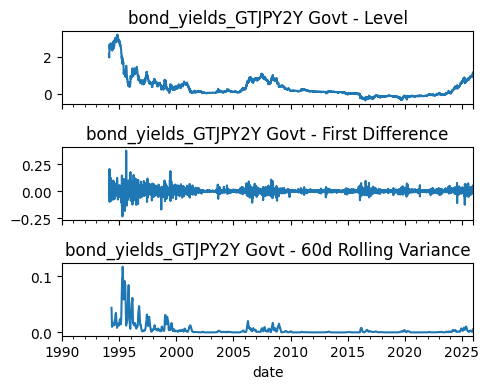

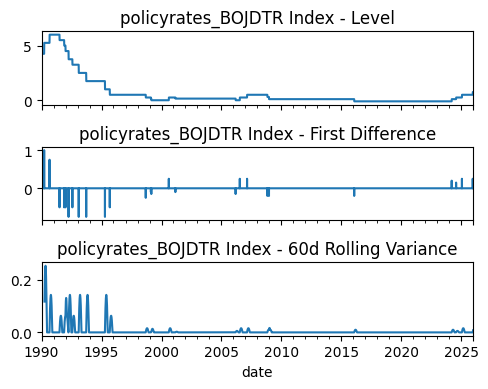

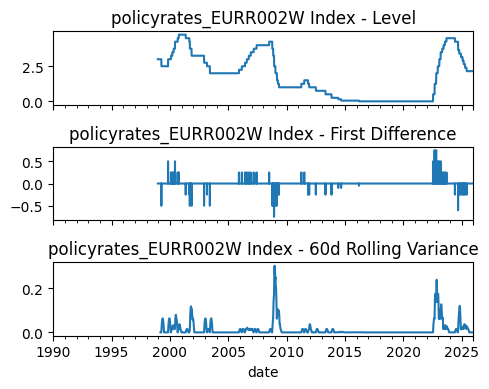

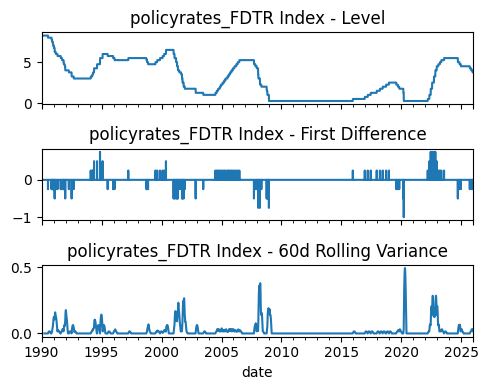

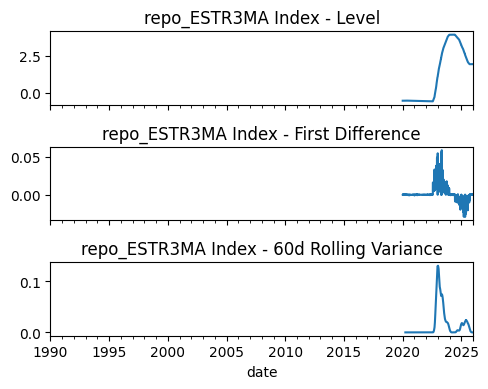

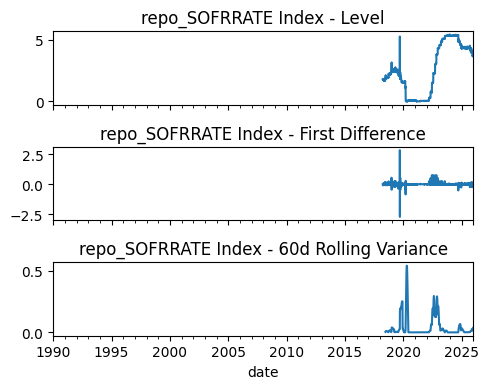

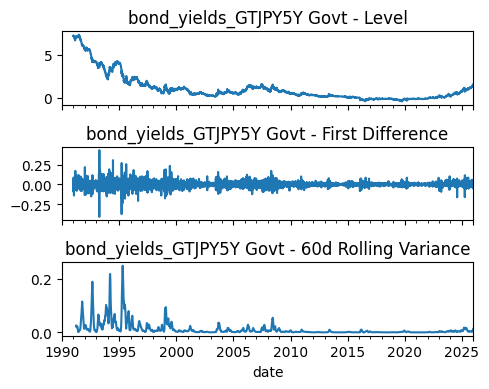

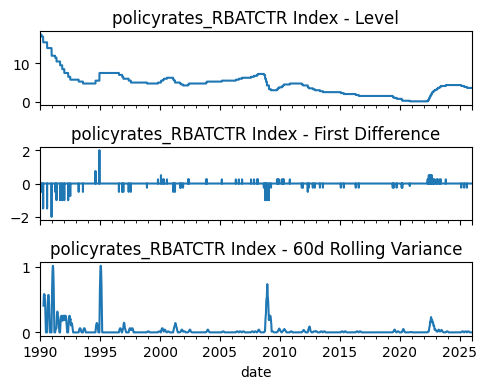

In [41]:
ambiguous_vars = final_map[final_map['recommended_form'].str.contains("Ambiguous")]

for var in ambiguous_vars['column']:
    fig, axes = plt.subplots(3,1, figsize=(5,4), sharex=True)

    df_daily[var].plot(ax=axes[0], title=f"{var} - Level")
    df_daily[var].diff().plot(ax=axes[1], title=f"{var} - First Difference")
    df_daily[var].rolling(60).var().plot(ax=axes[2], title=f"{var} - 60d Rolling Variance")

    plt.tight_layout()
    plt.show()